# Machine Learning Project

## Model Regression (ARIMA Model)

Tujuan dari project ini adalah untuk mengetahui perkiraan quantity product yang terjual sehingga tim inventory dapat membuat stock persediaan harian yang cukup. Prediksi yang dilakukan harus harian

## Clustering

Tujuan dari project ini adalah untuk membuat segment customer. Segment customer ini nantinya akan digunakan oleh tim marketing untuk memberikan personalized promotion dan sales treatment.

## INSTALL PACKAGES

In [1]:
pip install pmdarima

In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


## IMPORT DATA & LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from itertools import product

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [4]:
df = pd.read_csv("All_Data.csv")

## INSPEKSI DATA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  5020 non-null   object 
 1   customer_id     5020 non-null   int64  
 2   age             5020 non-null   int64  
 3   gender          5020 non-null   int64  
 4   marital_status  5020 non-null   object 
 5   income          5020 non-null   float64
 6   store_id        5020 non-null   int64  
 7   store_name      5020 non-null   object 
 8   group_store     5020 non-null   object 
 9   type            5020 non-null   object 
 10  latitude        5020 non-null   float64
 11  longitude       5020 non-null   int64  
 12  product_id      5020 non-null   object 
 13  product_name    5020 non-null   object 
 14  price           5020 non-null   int64  
 15  date            5020 non-null   object 
 16  qty             5020 non-null   int64  
 17  price-2         5020 non-null   i

In [6]:
df.head()

,transaction_id,customer_id,age,gender,marital_status,income,store_id,store_name,group_store,type,latitude,longitude,product_id,product_name,price,date,qty,price-2,total_amount
0,TR11369,328,36,0,Married,10.53,12,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554,P3,Crackers,7500,2022-01-01,4,7500,30000
1,TR16356,165,44,1,Married,14.58,1,Prima Tendean,Prima,Modern Trade,-6.2,106816666,P9,Yoghurt,10000,2022-01-01,7,10000,70000
2,TR1984,183,27,1,Single,0.18,4,Gita Ginara,Gita,General Trade,-6966667.0,110416664,P1,Choco Bar,8800,2022-01-01,4,8800,35200
3,TR35256,160,48,1,Married,12.57,4,Gita Ginara,Gita,General Trade,-6966667.0,110416664,P1,Choco Bar,8800,2022-01-01,7,8800,61600
4,TR41231,386,33,0,Married,6.95,4,Gita Ginara,Gita,General Trade,-6966667.0,110416664,P9,Yoghurt,10000,2022-01-01,1,10000,10000


In [7]:
df.tail()

,transaction_id,customer_id,age,gender,marital_status,income,store_id,store_name,group_store,type,latitude,longitude,product_id,product_name,price,date,qty,price-2,total_amount
5015,TR54423,243,38,0,Married,3.34,3,Prima Kota,Prima,Modern Trade,-7797068.0,110370529,P10,Cheese Stick,15000,2022-12-31,5,15000,75000
5016,TR5604,271,29,0,Married,4.74,9,Lingga,Lingga,Modern Trade,-3654703.0,128190643,P2,Ginger Candy,3200,2022-12-31,4,3200,12800
5017,TR81224,52,37,0,Married,3.73,9,Lingga,Lingga,Modern Trade,-3654703.0,128190643,P7,Coffee Candy,9400,2022-12-31,6,9400,56400
5018,TR85016,18,47,0,Married,13.60,13,Buana,Buana,General Trade,-126916.0,116825264,P8,Oat,16000,2022-12-31,3,16000,48000
5019,TR85684,55,34,1,Married,8.44,6,Lingga,Lingga,Modern Trade,-5135399.0,11942379,P8,Oat,16000,2022-12-31,1,16000,16000


### Melihat Dimensi Dataset

In [8]:
df.shape

(5020, 19)

Dataframe memiliki 5020 baris dan 19 kolom.

### Melihat Kolom dalam Dataset

In [9]:
df.columns

Index(['transaction_id', 'customer_id', 'age', 'gender', 'marital_status',
       'income', 'store_id', 'store_name', 'group_store', 'type', 'latitude',
       'longitude', 'product_id', 'product_name', 'price', 'date', 'qty',
       'price-2', 'total_amount'],
      dtype='object')

Dataset memiliki 19 Kolom, namun terdapat kolom yang memiliki nilai yang sama yakni kolom 'price' dan 'price-2'

### Melihat data yang hilang (missing values)

In [10]:
df.isna().sum()

transaction_id    0
customer_id       0
age               0
gender            0
marital_status    0
income            0
store_id          0
store_name        0
group_store       0
type              0
latitude          0
longitude         0
product_id        0
product_name      0
price             0
date              0
qty               0
price-2           0
total_amount      0
dtype: int64

Tidak terdapat Missing Values pada dataframe, karena sebelumnya sudah dibersihkan pada PostgreSQL

### Melihat data yang duplikat

In [11]:
df['transaction_id'].value_counts()

TR71313    3
TR42197    2
TR75968    2
TR90402    2
TR74019    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: transaction_id, Length: 4908, dtype: int64

Ternyata, terdapat data yang duplikat pada kolom 'transactions_id' yang dimana seharusnya kolom tersebut memiliki nilai yang unik (tidak duplikat). Berikut jumlah data duplikat yang muncul:
- 'TR71313' muncul sebanyak 3 kali.
- 'TR42197' muncul sebanyak 2 kali.
- 'TR75968' muncul sebanyak 2 kali.
- 'TR90402' muncul sebanyak 2 kali.
- 'TR74019' muncul sebanyak 2 kali.

In [12]:
df[df['transaction_id'] == 'TR71313']

,transaction_id,customer_id,age,gender,marital_status,income,store_id,store_name,group_store,type,latitude,longitude,product_id,product_name,price,date,qty,price-2,total_amount
1982,TR71313,117,45,1,Married,12.55,8,Sinar Harapan,Harapan Baru,General Trade,5.548290e+05,95323753,P1,Choco Bar,8800,2022-05-21,10,8800,88000
3336,TR71313,401,45,0,Married,4.08,11,Sinar Harapan,Prestasi,General Trade,5.335050e-01,101447403,P3,Crackers,7500,2022-08-30,6,7500,45000
3722,TR71313,370,26,1,Single,1.28,3,Prima Kota,Prima,Modern Trade,-7.797068e+06,110370529,P3,Crackers,7500,2022-09-26,2,7500,15000


### Melihat ringkasan dari data

In [13]:
df.describe()

,customer_id,age,gender,income,store_id,latitude,longitude,price,qty,price-2,total_amount
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5.020000e+03,5.020000e+03,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,40.003586,0.452988,8.623713,7.489841,-2.424569e+06,9.519178e+07,9684.800797,3.644622,9684.800797,32279.482072
std,129.672955,12.834719,0.497835,6.518242,4.028502,3.806625e+06,3.506809e+07,4600.708780,1.855295,4600.708780,19675.462455
min,1.000000,0.000000,0.000000,0.000000,1.000000,-7.797068e+06,1.052667e+07,3200.000000,1.000000,3200.000000,7500.000000
25%,108.000000,30.000000,0.000000,4.220000,4.000000,-6.914864e+06,9.867851e+07,4200.000000,2.000000,4200.000000,16000.000000
50%,221.000000,39.000000,0.000000,7.720000,7.000000,-2.990934e+06,1.076082e+08,9400.000000,3.000000,9400.000000,28200.000000
75%,332.000000,51.000000,1.000000,10.780000,11.000000,5.335050e-01,1.127688e+08,15000.000000,5.000000,15000.000000,47000.000000
max,447.000000,72.000000,1.000000,71.300000,14.000000,3.597031e+06,1.281906e+08,18000.000000,10.000000,18000.000000,88000.000000


Berdasarkan metode describe di atas, diperoleh beberapa hal sebagai berikut:
- customer_id: Ada 5020 pelanggan dalam dataset Anda.
- age: Kolom ini mewakili usia pelanggan. Usia rata-rata sekitar 40 tahun, dengan standar deviasi sekitar 12,83 tahun. Usia minimum adalah 0, dan usia maksimum adalah 72.
- gender: Kolom ini kemungkinan mewakili jenis kelamin, dengan 0 menunjukkan jenis kelamin permpuan dan 1 menunjukkan jenis kelamin laki-laki. Nilai rata-rata sekitar 0,45, menunjukkan variasi dalam representasi jenis kelamin.
- income: Pendapatan rata-rata sekitar 8,62, dengan standar deviasi sekitar 6,52.
- store_id: Kolom ini berisi ID toko. Ada 14 ID toko unik dalam dataset.
- latitude dan longitude: Kolom-kolom ini kemungkinan mewakili koordinat geografis pelanggan. Nilai-nilai nampaknya memiliki skala yang berbeda, mungkin akibat encoding atau preprocessing data.
- price: Harga rata-rata sekitar 9684,80, dengan standar deviasi sekitar 4600,71. Harga minimum adalah 3200, dan harga maksimum adalah 18000.
- qty: Kolom ini mewakili jumlah barang yang dibeli. Jumlah rata-rata sekitar 3,64, dengan standar deviasi sekitar 1,86.
- price-2: Kolom ini tampaknya merupakan duplikat atau ukuran harga lainnya, dengan statistik yang sama dengan kolom 'price'.
- total_amount: Kolom ini mewakili total biaya yang dihabiskan oleh pelanggan. Total biaya rata-rata sekitar 32279,48, dengan standar deviasi sekitar 19675,46. Total biaya minimum adalah 7500, dan total biaya maksimum adalah 88000.

### Memeriksa Data Pencilan (Outliers)

In [14]:
summary = df.describe()

# Loop melalui setiap kolom dalam ringkasan statistik
for kolom in summary.columns:
    # Mendapatkan nilai Q1, Q3, dan IQR dari ringkasan statistik
    Q1 = summary.loc['25%', kolom]
    Q3 = summary.loc['75%', kolom]
    IQR = Q3 - Q1
    
    # Menghitung lower bound dan upper bound untuk deteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mencetak outlier berdasarkan lower bound dan upper bound
    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    print(f"Outliers in {kolom}:")
    print(outliers)

Outliers in customer_id:
Empty DataFrame
Columns: [transaction_id, customer_id, age, gender, marital_status, income, store_id, store_name, group_store, type, latitude, longitude, product_id, product_name, price, date, qty, price-2, total_amount]
Index: []
Outliers in age:
Empty DataFrame
Columns: [transaction_id, customer_id, age, gender, marital_status, income, store_id, store_name, group_store, type, latitude, longitude, product_id, product_name, price, date, qty, price-2, total_amount]
Index: []
Outliers in gender:
Empty DataFrame
Columns: [transaction_id, customer_id, age, gender, marital_status, income, store_id, store_name, group_store, type, latitude, longitude, product_id, product_name, price, date, qty, price-2, total_amount]
Index: []
Outliers in income:
     transaction_id  customer_id  age  gender marital_status  income  \
100         TR73336          399   52       1     Single       33.77   
142         TR82224          246   40       1     Single       21.81   
337      

"Empty DataFrame" menunjukkan bahwa tidak ada nilai yang diidentifikasi sebagai outlier dalam kolom tersebut. Namun, ternyata terdapat beberapa kolom yang memiliki outliers seperti kolom-kolom berikut:
- kolom 'income'
- kolom 'longitude'
- kolom 'qty'

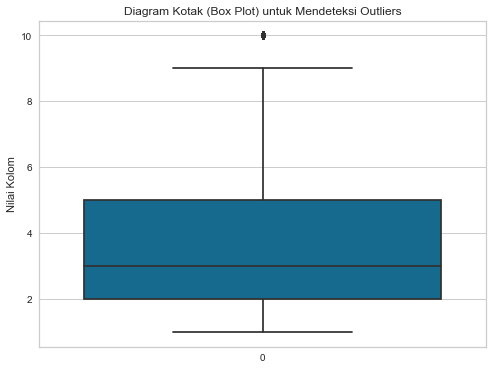

In [15]:
#Box Plot untuk kolom 'qty'

plt.figure(figsize=(8, 6))
sns.boxplot(data=df['qty'], orient='v')
plt.title("Diagram Kotak (Box Plot) untuk Mendeteksi Outliers")
plt.ylabel("Nilai Kolom")
plt.show()

## DATA CLEANSING

### Membersihkan Duplikat Data

In [16]:
df = df.drop_duplicates(subset='transaction_id')

In [17]:
df['transaction_id'].value_counts()

TR11369    1
TR7241     1
TR25557    1
TR15572    1
TR11870    1
          ..
TR6576     1
TR59105    1
TR54351    1
TR52555    1
TR85684    1
Name: transaction_id, Length: 4908, dtype: int64

Data sudah tidak memiliki nilai yag duplikat

### Mengubah Tipe data kolom 'date' kedalam Tipe data Datetime

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4908 entries, 0 to 5019
Series name: date
Non-Null Count  Dtype         
--------------  -----         
4908 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB


### Menghapus kolom duplikat dari kolon 'price' yakni kolom 'price-2'

In [20]:
df = df.drop("price-2", axis=1)

In [21]:
df.columns

Index(['transaction_id', 'customer_id', 'age', 'gender', 'marital_status',
       'income', 'store_id', 'store_name', 'group_store', 'type', 'latitude',
       'longitude', 'product_id', 'product_name', 'price', 'date', 'qty',
       'total_amount'],
      dtype='object')

Kolom duplikat dari kolom 'price' yakni kolom 'price-2' sudah dihilangkan

### Mengubah Tipe data 'longitude' kedalam Tipe data 'float'

Karena kolom 'latitude' dan 'longtitude' memiliki tipe data yang berbeda, maka kolom 'longtitude' akan diubah tipenya menjadi tipe data 'float'

In [22]:
df['longitude'] = df['longitude'].astype('float64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  4908 non-null   object        
 1   customer_id     4908 non-null   int64         
 2   age             4908 non-null   int64         
 3   gender          4908 non-null   int64         
 4   marital_status  4908 non-null   object        
 5   income          4908 non-null   float64       
 6   store_id        4908 non-null   int64         
 7   store_name      4908 non-null   object        
 8   group_store     4908 non-null   object        
 9   type            4908 non-null   object        
 10  latitude        4908 non-null   float64       
 11  longitude       4908 non-null   float64       
 12  product_id      4908 non-null   object        
 13  product_name    4908 non-null   object        
 14  price           4908 non-null   int64         
 15  date

Terlihat bahwa kolom 'latitude' dan 'longtitude' sudah memiliki tipe data yang sama, yakni tipe data 'float'

### Menghapus Data Outliers

Karena hanya kolom 'qty' yang akan digunakan dalam model baik untuk ARIMA dan Clustering, maka hanya Data Outliers pada kolom 'qty' yang akan dibersihkan

In [24]:
# Ambil kolom data
column_data = df['qty']

# Hitung IQR (Interquartile Range)
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
cleaned_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# Menggabungkan cleaned_data ke dalam dataframe utama
df['qty'] = cleaned_data

## ARIMA

### Mengelompokan Data

In [25]:
# Groupby 'date' dan mengagregasikan 'qty' dengan fungsi sum
agg_df = df.groupby('date')['qty'].sum().reset_index()

# Menampilkan hasil
print(agg_df)

          date   qty
0   2022-01-01  49.0
1   2022-01-02  49.0
2   2022-01-03  63.0
3   2022-01-04  45.0
4   2022-01-05  30.0
..         ...   ...
360 2022-12-27  70.0
361 2022-12-28  58.0
362 2022-12-29  42.0
363 2022-12-30  41.0
364 2022-12-31  37.0

[365 rows x 2 columns]


In [26]:
agg_df.head(10)

,date,qty
0,2022-01-01,49.0
1,2022-01-02,49.0
2,2022-01-03,63.0
3,2022-01-04,45.0
4,2022-01-05,30.0
5,2022-01-06,71.0
6,2022-01-07,37.0
7,2022-01-08,47.0
8,2022-01-09,47.0
9,2022-01-10,60.0


### Visualisasi Hasil Pengelompokan Data

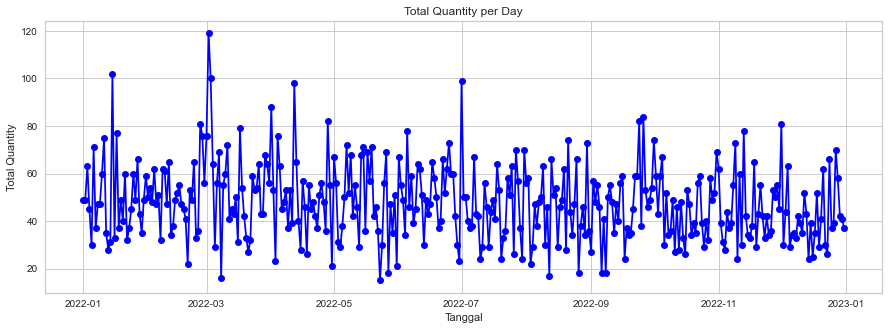

In [27]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 5))

# Mengambil nilai tanggal untuk sumbu x
tanggal = agg_df['date']

# Mengambil nilai qty untuk sumbu y
qty = agg_df['qty']

# Menggambar line plot
plt.plot(tanggal, qty, color='blue', marker='o')

# Memberi label sumbu x dan y
plt.xlabel('Tanggal')
plt.ylabel('Total Quantity')

# Memberi judul plot
plt.title('Total Quantity per Day')

# Menampilkan plot
plt.show()

### Stationary Test

Stationary Test yang dilakukan menggunakan Uji Augmented Dickey-Fuller (ADF)

In [28]:
# Mengambil kolom yang akan diuji stasioneritasnya
data = agg_df['qty']

# Melakukan tes ADF
result = adfuller(data)

# Mencetak hasil tes ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -18.319610390556896
p-value: 2.267263961061323e-30
Critical Values:
1%: -3.4484434475193777
5%: -2.869513170510808
10%: -2.571017574266393


Berdasarkan hasil tes ADF di atas, berikut adalah interpretasinya:
- ADF Statistic: -18.319610390556896: Ini adalah nilai statistik uji ADF yang sangat negatif. Nilai ini digunakan untuk mengevaluasi sejauh mana data deret waktu tersebut mungkin stasioner. Semakin negatif nilainya, semakin mungkin data tersebut stasioner.

- p-value: 2.267263961061323e-30: P-value yang sangat kecil (dalam notasi ilmiah, e-30 adalah 10 pangkat minus 30) menunjukkan bahwa kita memiliki cukup bukti untuk menolak hipotesis nol. Hipotesis nol dalam uji ADF adalah bahwa data deret waktu tidak stasioner. Dalam hal ini, kita dapat menolak hipotesis nol.

- Critical Values (Nilai Kritis): Ini adalah nilai-nilai yang digunakan sebagai perbandingan. Jika nilai ADF Statistic lebih negatif daripada nilai kritis tertentu, maka data cenderung stasioner. Kita memiliki tiga tingkat signifikansi yang umum digunakan: 1%, 5%, dan 10%. Dalam hal ini, nilai ADF Statistic lebih negatif daripada semua nilai kritis ini.

Dengan hasil ini, dapat disimpulkan bahwa deret waktu ini adalah stasioner. Artinya, tidak ada tren signifikan atau komponen non-stasioner dalam data.

### Split Data Train dan Test

Data akan dibagi menjadi 80% data latih dan 20% data uji

In [29]:
# Mengurutkan dataset berdasarkan kolom tanggal
agg_df = agg_df.sort_values('date')

# Menghitung jumlah baris untuk data latih
train_rows = int(0.8 * len(agg_df))

# Memisahkan data latih dan data uji
train_df = agg_df.iloc[:train_rows]
test_df = agg_df.iloc[train_rows:]

In [30]:
train_df.shape

(292, 2)

In [31]:
test_df.shape

(73, 2)

In [32]:
train_df.head(10)

,date,qty
0,2022-01-01,49.0
1,2022-01-02,49.0
2,2022-01-03,63.0
3,2022-01-04,45.0
4,2022-01-05,30.0
5,2022-01-06,71.0
6,2022-01-07,37.0
7,2022-01-08,47.0
8,2022-01-09,47.0
9,2022-01-10,60.0


In [33]:
test_df.head(10)

,date,qty
292,2022-10-20,39.0
293,2022-10-21,35.0
294,2022-10-22,56.0
295,2022-10-23,59.0
296,2022-10-24,39.0
297,2022-10-25,29.0
298,2022-10-26,40.0
299,2022-10-27,32.0
300,2022-10-28,58.0
301,2022-10-29,49.0


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    292 non-null    datetime64[ns]
 1   qty     292 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


### Visualisasi Hasil Split Data

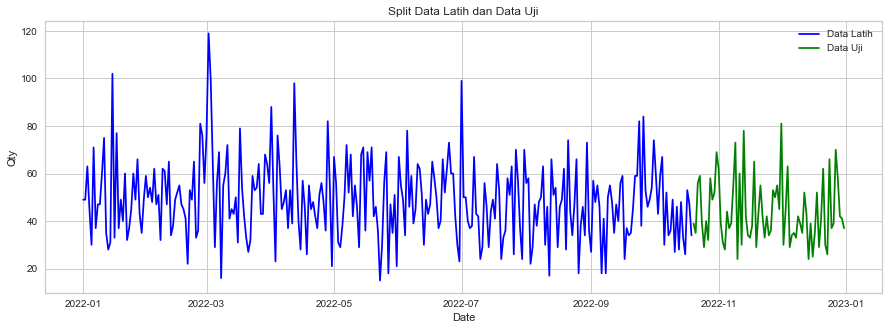

In [35]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 5))

# Mengambil nilai tanggal untuk sumbu x
tanggal = agg_df['date']

# Mengambil nilai target untuk sumbu y
target = agg_df['qty']

# Mengambil nilai tanggal data latih untuk sumbu x
train_tanggal = train_df['date']

# Mengambil nilai target data latih untuk sumbu y
train_target = train_df['qty']

# Mengambil nilai tanggal data uji untuk sumbu x
test_tanggal = test_df['date']

# Mengambil nilai target data uji untuk sumbu y
test_target = test_df['qty']

# Menggambar line plot untuk data latih
plt.plot(train_tanggal, train_target, color='blue', label='Data Latih')

# Menggambar line plot untuk data uji
plt.plot(test_tanggal, test_target, color='green', label='Data Uji')

# Memberi label sumbu x dan y
plt.xlabel('Date')
plt.ylabel('Qty')

# Memberi judul plot
plt.title('Split Data Latih dan Data Uji')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

### Melihat Rentang Tanggal dari Data Train dan Test

In [36]:
train_tanggal.min()

Timestamp('2022-01-01 00:00:00')

In [37]:
train_tanggal.max()

Timestamp('2022-10-19 00:00:00')

In [38]:
test_tanggal.min()

Timestamp('2022-10-20 00:00:00')

In [39]:
test_tanggal.max()

Timestamp('2022-12-31 00:00:00')

## Pencarian model ARIMA terbaik

Pencarian model ARIMA terbaik menggunakan pustaka pmdarima (Pyramid ARIMA).

In [40]:
# Mencari model ARIMA terbaik dengan mode stepwise
auto_arima = pm.auto_arima(train_df['qty'], seasonal=False, stepwise=True, trace=True)
auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2648.913, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2576.566, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2646.914, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2548.287, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2513.212, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2509.129, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2496.659, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2494.677, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2507.140, Time=0.12 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2466.989, Time=0.36 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2465.409, T

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

Dari hasil di atas, diperoleh orde autoregressive (AR) p=2, orde differencing (I) d=1, dan orde moving average (MA) q=3. 

### Pembuatan, Pelatihan, dan Penilaian model ARIMA

Berikut merupakan pebuatan, pelatihan, dan penilaian model ARIMA dengan orde yang sudah ditentukan, yaitu ARIMA(2, 1, 3).

In [41]:
'''
Membuat sebuah list kosong aic_scores yang akan digunakan untuk 
menyimpan skor AIC (Akaike Information Criterion) dari model-model yang dievaluasi.
'''
aic_scores = []

# Fit model ARIMA
model = ARIMA(agg_df['qty'], order=(2, 1, 3))
model_fit = model.fit()

# Menambahkan skor AIC ke list
aic_scores.append({'order': '(2, 1, 3)', 'aic': model_fit.aic})

# Cetak hasil AIC
for result in aic_scores:
    print(f"Order: {result['order']}, AIC: {result['aic']}")

Order: (2, 1, 3), AIC: 3054.408029320686


C:\Folder Baru\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


"AIC: 3054.408029320686": Ini adalah nilai skor AIC (Akaike Information Criterion) dari model ARIMA yang diperoleh. Skor AIC digunakan untuk membandingkan berbagai model ARIMA. Semakin rendah nilai AIC, semakin baik model tersebut dalam menggambarkan data, dengan mempertimbangkan kompleksitas model. Dalam hal ini, nilai AIC adalah sekitar 3054.408029320686.

### Pembuatan list kombinasi dengan berbagai orde (p, d, q)

In [42]:
# Membuat list untuk p, d, dan q
p = range(8)  # 0 to 7
d = range(3)  # 0 to 2
q = range(8)  # 0 to 8

# Menggunakan fungsi product dari itertools untuk membuat kombinasi p, d, dan q
pdq = list(product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 0, 6), (2, 0, 7), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 2, 6), (2, 2, 7), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 0, 6), (3, 0, 7), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 1, 7), (3, 2, 0), (3, 2, 1), (3, 2, 2)

### Pencarian model ARIMA terbaik dengan menguji berbagai kombinasi orde (p, d, q)

In [43]:
# daftar untuk menyimpan skor AIC
aic_scores = []

# grid manual untuk mencari p, d, q yang optimal
for param in pdq:
    # Fitting model ARIMA
    try:
        model = ARIMA(agg_df['qty'], order=param)
        model_fit = model.fit()
        # menambahkan skor AIC ke daftar
        aic_scores.append({'param': param, 'aic': model_fit.aic})
    except:
        continue

# Menemukan skor AIC terkecil
best_aic = min(aic_scores, key=lambda x: x['aic'])

print(best_aic)

C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible 

{'param': (3, 1, 7), 'aic': 3052.4310055011956}


C:\Folder Baru\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Perbandingan Hasil Prediksi 

Berikut adalah perbandingan hasil prediksi dari model ARIMA terbaik dengan model ARIMA yang dihasilkan dari pencarian otomatis (Auto ARIMA) dengan data asli dan data pengujian. 

C:\Folder Baru\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


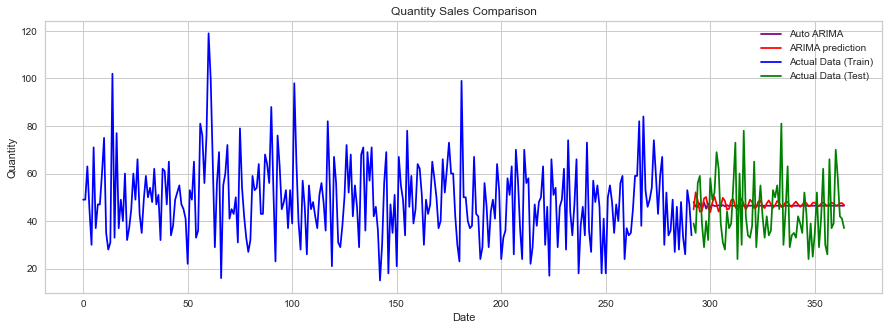

In [44]:
# Membuat model ARIMA dengan orde terbaik
best_order = best_aic['param']  # Mengambil orde terbaik dari hasil sebelumnya
model = ARIMA(train_df['qty'], order=best_order)  # Menggunakan 'tty' sebagai data dalam ARIMA
model_fit = model.fit()


# Mendefinisikan 'forecast' sebagai prediksi dari model Auto ARIMA
forecast = auto_arima.predict(n_periods=len(test_df['qty']))

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian
preds = model_fit.forecast(steps=len(test_df))

# Plot forecast dari model auto arima (forecast)
forecast.plot(label='Auto ARIMA', color='purple',figsize = (15,5))

# Plot prediksi dari model ARIMA (preds)
plt.plot(test_df.index, preds, label='ARIMA prediction', color='red')

# Plot data pelatihan (train_df)
train_df['qty'].plot(label='Actual Data (Train)', color='blue',figsize = (15,5))

# Plot data pengujian (test_df)
test_df['qty'].plot(label='Actual Data (Test)', color='green',figsize = (15,5))

plt.title('Quantity Sales Comparison')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

### Evaluasi Model

Berikut merupakan Evaluasi dari Model ARIMA Prediction

In [45]:
# Menghitung prediksi pada data pelatihan
train_predictions = model_fit.predict(start=train_df.index[0], end=train_df.index[-1])

# Menghitung RMSE untuk data pelatihan
train_rmse = np.sqrt(mean_squared_error(train_df['qty'], train_predictions))

# Menghitung RMSE untuk data pengujian
test_rmse = np.sqrt(mean_squared_error(test_df['qty'], preds))

# Menghitung MAE untuk data pelatihan
train_mae = mean_absolute_error(train_df['qty'], train_predictions)

# Menghitung MAE untuk data pengujian
test_mae = mean_absolute_error(test_df['qty'], preds)

# Menghitung MAPE untuk data pelatihan
train_mape = mean_absolute_percentage_error(train_df['qty'], train_predictions)

# Menghitung MAPE untuk data pengujian
test_mape = mean_absolute_percentage_error(test_df['qty'], preds)

print(f"RMSE for Training Data: {train_rmse:.2f}")
print(f"RMSE for Testing Data: {test_rmse:.2f}")
print(f"MAE for Training Data: {train_mae:.2f}")
print(f"MAE for Testing Data: {test_mae:.2f}")
print(f"MAPE for Training Data: {train_mape:.2f}%")
print(f"MAPE for Testing Data: {test_mape:.2f}%")

RMSE for Training Data: 16.34
RMSE for Testing Data: 14.16
MAE for Training Data: 12.65
MAE for Testing Data: 12.20
MAPE for Training Data: 0.32%
MAPE for Testing Data: 0.31%


Secara umum, nilai RMSE dan MAE yang lebih rendah menunjukkan kinerja model yang lebih baik, sementara MAPE yang lebih rendah menunjukkan kesalahan relatif yang lebih kecil dalam bentuk persentase. Dalam konteks ini, model memiliki RMSE dan MAE yang lebih rendah pada data pengujian, yang menunjukkan bahwa ia melakukan prediksi yang lebih baik pada data yang tidak digunakan dalam pelatihan, yang seringkali menjadi fokus utama dalam pemodelan deret waktu.

### Pemodelan Manual Forecast (ARIMA dengan Pengisian Orde secara Manual)

In [46]:
# Membuat model ARIMA dengan orde yang sesuai (p, d, q)
model_manual = ARIMA(train_df['qty'], order=(40, 2, 2))

# Melatih model dengan data pelatihan
model_fit_manual = model_manual.fit()

C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Folder Baru\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Perbandingan 3 Model Prediksi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17332\2800448322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['forecast_manual'] = forecast_manual
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17332\2800448322.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['forecast_hyper'] = forecast_hyper
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17332\2800448322.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

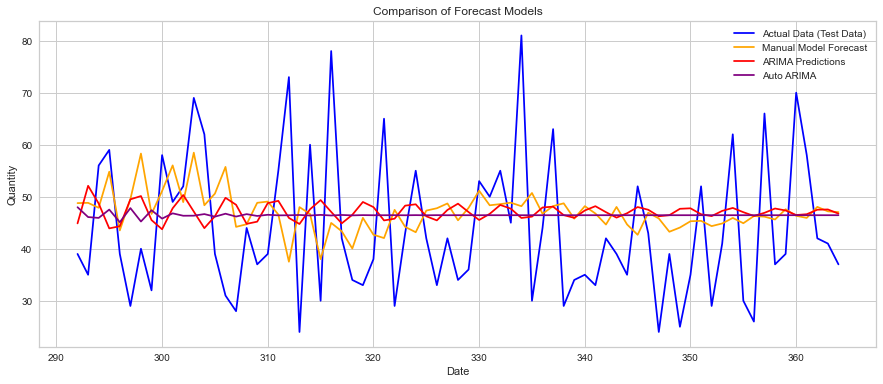

In [47]:
# Plot prediksi untuk model manual
forecast_manual = model_fit_manual.forecast(steps=len(test_df))

# Plot prediksi untuk model dengan orde terbaik
forecast_hyper = preds

# Plot prediksi untuk model auto ARIMA
forecast_auto = forecast

# Memotong data historis untuk memvisualisasikan hasil yang lebih relevan
df_plot = agg_df.iloc[-len(test_df):]

# Menambahkan prediksi ke DataFrame df_plot
df_plot['forecast_manual'] = forecast_manual
df_plot['forecast_hyper'] = forecast_hyper
df_plot['forecast_auto'] = forecast_auto

# Plot data historis dan prediksi
plt.figure(figsize=(15, 6))
plt.plot(df_plot.index, df_plot['qty'], label='Actual Data (Test Data)', color='blue')
plt.plot(df_plot.index, df_plot['forecast_manual'], label='Manual Model Forecast', color='orange')
plt.plot(df_plot.index, df_plot['forecast_hyper'], label='ARIMA Predictions', color='red')
plt.plot(df_plot.index, df_plot['forecast_auto'], label='Auto ARIMA', color='purple')

plt.title('Comparison of Forecast Models')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

### Evaluasi Model Manual Forecast

In [48]:
# Menghitung MAE (Mean Absolute Error) antara data pengujian dan prediksi manual
mae = mean_absolute_error(test_df['qty'], forecast_manual)

# Menghitung MAPE (Mean Absolute Percentage Error) antara data pengujian dan prediksi manual
mape = mean_absolute_percentage_error(test_df['qty'], forecast_manual)

# Menghitung RMSE (Root Mean Square Error) antara data pengujian dan prediksi manual
rmse = np.sqrt(mean_squared_error(test_df['qty'], forecast_manual))


# Mencetak hasil metrik evaluasi
print(f"MAE for Testing Data: {mae:.2f}")
print(f"MAPE for Testing Data: {mape:.2f}%")
print(f"RMSE for Testing Data: {rmse:.2f}")

MAE for Testing Data: 11.89
MAPE for Testing Data: 0.30%
RMSE for Testing Data: 14.14


### Forecasting

### Prediksi untuk 31 Hari ke depan

In [49]:
# Membuat model ARIMA dengan orde (40, 2, 2)
model = ARIMA(agg_df['qty'], order=(40, 2, 2))

# Melatih model dengan data
model_fit = model.fit()

# Melakukan prediksi untuk 31 langkah ke depan
forecast = model_fit.forecast(steps=31)

C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Folder Baru\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Folder Baru\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Visualisasi Hasil Prediksi

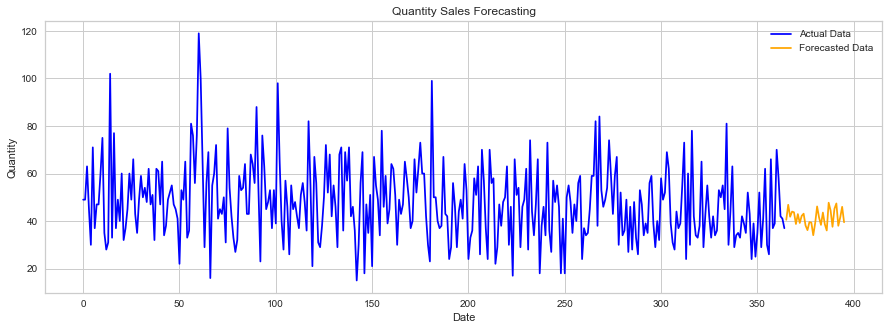

In [50]:
# Plot data historis
plt.figure(figsize=(15, 5))
plt.plot(agg_df.index, agg_df['qty'], label='Actual Data', color='blue', linestyle='-')  

# Plot hasil prediksi
plt.plot(forecast.index, forecast, color='orange', label='Forecasted Data', linestyle='-')  

# Menambahkan judul dan label sumbu
plt.title('Quantity Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity')

# Menambahkan legenda yang berada di sudut kanan atas
plt.legend(loc='upper right')

# Menampilkan grid untuk membantu dalam interpretasi
plt.grid(True)

# Menampilkan grafik
plt.show()

### Hasil Prediksi Selama 31 Hari ke depan

In [51]:
# Konversi hasil prediksi (forecast) menjadi DataFrame
forecast_df = pd.DataFrame({'Forecasted Quantity': forecast})

# Menampilkan DataFrame hasil prediksi
print(forecast_df)

     Forecasted Quantity
365            40.543452
366            46.847805
367            41.818454
368            43.985963
369            43.678940
370            38.757870
371            42.925998
372            39.198703
373            42.190821
374            43.105299
375            38.127501
376            36.174151
377            39.564125
378            39.352755
379            34.041768
380            39.149950
381            46.146211
382            41.539383
383            38.383473
384            43.577883
385            38.661783
386            36.036104
387            47.723728
388            44.466209
389            37.588074
390            45.183132
391            47.410588
392            38.008142
393            41.499140
394            45.990757
395            39.494387


In [52]:
forecast_df

,Forecasted Quantity
365,40.543452
366,46.847805
367,41.818454
368,43.985963
369,43.678940
370,38.757870
371,42.925998
372,39.198703
373,42.190821
374,43.105299


In [53]:
forecast_df.describe()

,Forecasted Quantity
count,31.000000
mean,41.328147
std,3.596403
min,34.041768
25%,38.709827
50%,41.499140
75%,43.832451
max,47.723728


## CLUSTERING

### Mengelompokkan Data

Dataframe ini berisi data agregasi untuk setiap pelanggan, termasuk jumlah transaksi, total kuantitas produk yang dibeli, dan total jumlah uang yang dihabiskan oleh setiap pelanggan.

In [54]:
cluster_data = df.groupby('customer_id').agg({
    'transaction_id': 'count',
    'qty': 'sum',
    'total_amount': 'sum',
}).reset_index()

In [55]:
cluster_data.head()

,customer_id,transaction_id,qty,total_amount
0,1,17,60.0,623300
1,2,13,57.0,392300
2,3,15,56.0,446200
3,4,10,46.0,302500
4,5,7,27.0,268600


### Menghapus kolom "customer_id"

In [56]:
data = cluster_data.drop('customer_id', axis=1)

In [57]:
data.head()

,transaction_id,qty,total_amount
0,17,60.0,623300
1,13,57.0,392300
2,15,56.0,446200
3,10,46.0,302500
4,7,27.0,268600


### Standarisasi Data

In [58]:
# Buat objek StandardScaler
scaler = StandardScaler()

# Fitkan StandardScaler pada data
scaler.fit(data)

# Standarisasi data
standardized_data = scaler.transform(data)

# Buat DataFrame baru dari standardized_data
df_standardized = pd.DataFrame(standardized_data, columns=['transaction_id', 'qty', 'total_amount'])

print("Data Asli:")
print(data)
print("\nData Setelah Standarisasi:")
print(standardized_data)

Data Asli:
     transaction_id   qty  total_amount
0                17  60.0        623300
1                13  57.0        392300
2                15  56.0        446200
3                10  46.0        302500
4                 7  27.0        268600
..              ...   ...           ...
442              15  54.0        410100
443              18  62.0        577700
444              18  68.0        587200
445              11  42.0        423300
446              13  42.0        439300

[447 rows x 3 columns]

Data Setelah Standarisasi:
[[1.8591775  1.68172201 2.15968326]
 [0.62387116 1.44070574 0.3022972 ]
 [1.24152433 1.36036699 0.73568728]
 ...
 [2.16800409 2.32443205 1.86941644]
 [0.00621798 0.2356244  0.5515568 ]
 [0.62387116 0.2356244  0.68020692]]


In [59]:
df_standardized.head()

,transaction_id,qty,total_amount
0,1.859178,1.681722,2.159683
1,0.623871,1.440706,0.302297
2,1.241524,1.360367,0.735687
3,-0.302609,0.556979,-0.419752
4,-1.229088,-0.969457,-0.692329


### Menghitung Within-Cluster Sum of Squares (WCSS)

Within-Cluster Sum of Squares (WCSS) digunakan untuk menentukan jumlah kluster yang optimal dalam analisis pengelompokan (clustering). 

In [60]:
# Inisialisasi list untuk menghitung within-cluster sum of squares (WCSS)
wcss = []

# Range jumlah klaster yang akan ditelusuri
num_clusters = range(1, 11)

for n_clusters in num_clusters:
    # Membuat model K-Means dengan jumlah klaster tertentu
    model = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, tol=0.0001, random_state=100)
    
    # Melatih model pada data yang telah dinormalisasi
    model.fit(df_standardized)
    
    # Menambahkan nilai Inertia (WCSS) ke dalam list
    wcss.append(model.inertia_)

C:\Folder Baru\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Grafik Elbow Method

Elbow Method akan membantu dalam menentukan jumlah kluster yang optimal.

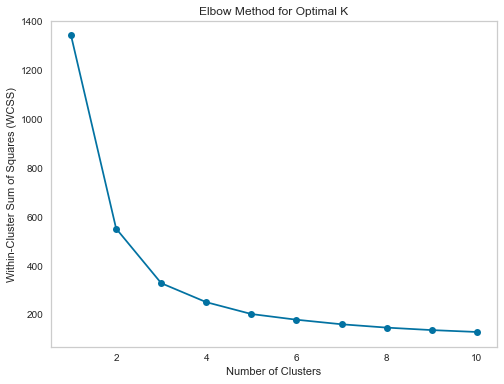

In [61]:
# Plot Elbow Method untuk menentukan jumlah klaster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

### Clustering dengan algoritma K-Means dan memvisualisasikan elbow curve

C:\Folder Baru\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


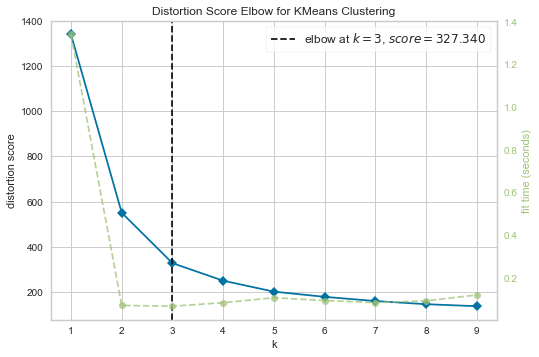

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Instantiate the KMeans model
model = KMeans()

# Instantiate the KElbowVisualizer with the KMeans model and k values to explore
visualizer = KElbowVisualizer(model, k=(1, 10))

# Fit the visualizer to the data (df_standardized)
visualizer.fit(df_standardized)

# Visualize the elbow curve
visualizer.show()

### Clustering menggunakan algoritma K-Means dan menambahkan label kluster ke dalam dataframe asli

In [63]:
# Specify the number of clusters
n_clusters = 3

# Create the KMeans object
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=100)

# Fit the KMeans model on the normalized data
kmeans.fit(df_standardized)

# Get the cluster labels for the data points
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
data['cluster'] = cluster_labels

print("Original Data with Cluster Labels:")
print(data)

Original Data with Cluster Labels:
     transaction_id   qty  total_amount  cluster
0                17  60.0        623300        1
1                13  57.0        392300        1
2                15  56.0        446200        1
3                10  46.0        302500        0
4                 7  27.0        268600        2
..              ...   ...           ...      ...
442              15  54.0        410100        1
443              18  62.0        577700        1
444              18  68.0        587200        1
445              11  42.0        423300        0
446              13  42.0        439300        0

[447 rows x 4 columns]


### Pair Plot

Pair plot digunakan untuk memvisualisasikan hubungan antara pasangan (pair) dari variabel dalam dataframe. Pair plot ini memungkinkan kita untuk memahami hubungan antara variabel-variabel tersebut dan juga membedakan antara kluster yang ada dalam data.

<Figure size 1080x360 with 0 Axes>

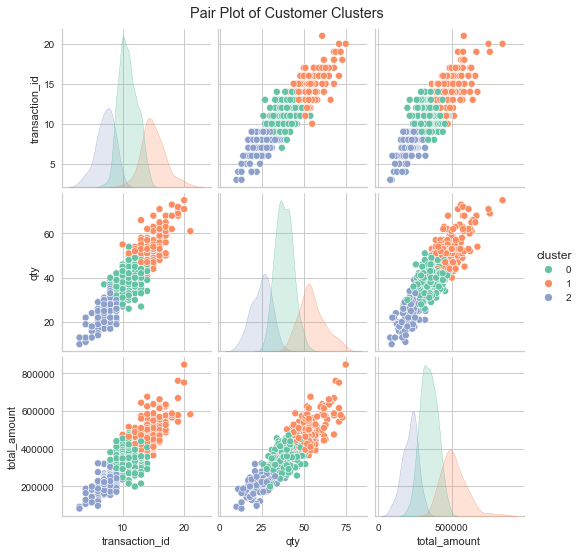

In [64]:
plt.figure(figsize=(15, 5))
g = sns.pairplot(data=data, hue='cluster', palette='Set2')
g.fig.suptitle("Pair Plot of Customer Clusters", y=1.02)
plt.show()

### Evaluasi

Silhouette Coefficient akan digunakan sebagai metrik evalusi hasil clustering. Silhouette Coefficient merupakan metrik evaluasi untuk mengukur seberapa baik pengelompokan (clustering) berfungsi dalam memisahkan antara kluster-kluster yang berbeda.

In [65]:
# Calculate Silhouette Coefficient
silhouette_avg = silhouette_score(df_standardized, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.42898946377059083


Dalam kasus ini, nilai Silhouette Coefficient adalah 0.42898946377059083. Nilai ini menunjukkan bahwa clustering yang Anda lakukan memiliki tingkat pemisahan yang cukup baik antara kluster dan data point dalam kluster tersebut. Semakin mendekati 1, semakin baik pemisahan antara kluster, sedangkan semakin mendekati -1, semakin buruk pemisahan antara kluster.

In [66]:
data['customer_id'] = cluster_data['customer_id']
cluster_data_agg = data.groupby('cluster').agg({'customer_id':'count','transaction_id':'mean','qty':'mean','total_amount':'mean'})
cluster_data_agg.sort_values('customer_id', ascending = False)

,customer_id,transaction_id,qty,total_amount
cluster,,,,
0,215,10.879070,38.339535,344466.046512
2,117,7.196581,24.760684,217399.145299
1,115,15.017391,54.982609,513536.521739


Berikut beberapa rekomendasi yang dapat diberikan kepada tim pemasaran untuk setiap klaster pelanggan:

**Kluster 0:**

**Penjelasan:** Kluster ini memiliki rata-rata 215 pelanggan, rata-rata 10.88 transaksi per pelanggan, dan rata-rata total pengeluaran sekitar 344,466 unit mata uang per pelanggan.

**Rekomendasi:**
- Fokus pada mempertahankan dan meningkatkan loyalitas pelanggan dalam kluster ini karena mereka memiliki jumlah transaksi yang tinggi.
- Tawarkan program loyalitas atau insentif tambahan untuk mendorong pelanggan untuk melakukan lebih banyak transaksi.
- Identifikasi produk atau layanan yang sering dibeli oleh kluster ini dan pertimbangkan untuk mengembangkan penawaran atau promosi khusus.

**Kluster 2:**

**Penjelasan:** Kluster ini memiliki rata-rata 117 pelanggan, rata-rata 7.20 transaksi per pelanggan, dan rata-rata total pengeluaran sekitar 217,399 unit mata uang per pelanggan.

**Rekomendasi:**
- Fokus pada meningkatkan frekuensi transaksi pelanggan dalam kluster ini. Tawarkan insentif atau promosi untuk mendorong mereka melakukan lebih banyak transaksi.
- Identifikasi produk atau layanan yang mungkin menarik bagi kluster ini dan pertimbangkan untuk mengembangkan penawaran khusus.
- Lakukan survei atau wawancara pelanggan untuk memahami lebih baik kebutuhan dan preferensi mereka.

**Kluster 1:**

**Penjelasan:** Kluster ini memiliki rata-rata 115 pelanggan, rata-rata 15.02 transaksi per pelanggan, dan rata-rata total pengeluaran sekitar 513,537 unit mata uang per pelanggan.

**Rekomendasi:**
- Pertahankan dan tingkatkan pengalaman pelanggan dalam kluster ini, karena mereka memiliki frekuensi transaksi yang tinggi dan pengeluaran yang besar.
- Tawarkan pelayanan pelanggan yang unggul dan respon yang cepat terhadap permintaan atau masalah pelanggan.
- Pertimbangkan untuk memberikan insentif khusus kepada pelanggan dalam kluster ini sebagai tanda penghargaan atas kesetiaan mereka.
- Identifikasi produk atau layanan premium yang mungkin menarik bagi kluster ini dan pertimbangkan untuk mengembangkan penawaran eksklusif.